# IMPORT LIBRARIES

In [1]:
import numpy 
import pandas 
import keras
import tensorflow as tf
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# LOAD DATASET

In [2]:
from tensorflow.keras.datasets import mnist

# TRAIN TEST SPLIT DATA(# HERE DATA IS ALREADY DIVIDED INTO TRAIN AND TEST)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# VISUALIZING IMAGE DATA

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

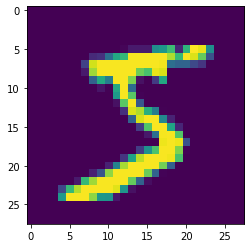

In [8]:
plt.imshow(single_image)

# PRE-PROCESSING DATA

## LABELS

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### USE ONE HOT ENCODING ON TRAINING DATA

In [11]:
from tensorflow.keras.utils import to_categorical 

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

#### PROCESSING X DATA

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.max()

1.0

In [23]:
scaled_single.min()

0.0

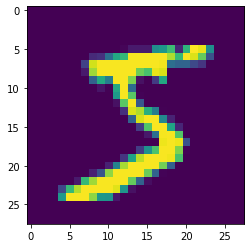

In [24]:
plt.imshow(scaled_single)

#### RESHAPING DATA

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_train = x_train.reshape(60000,28,28,1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

# BUILDING THE MODEL 

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# TRAIN THE MODEL

In [36]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1336 - accuracy: 0.9606 - val_loss: 0.0528 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0429 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0463 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.0459 - val_accuracy: 0.9854


# EVALUATE THE MODEL

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.133588,0.960583,0.052777,0.9835
1,0.045680,0.985967,0.042948,0.9850
2,0.030414,0.990300,0.046338,0.9845
3,0.021428,0.992833,0.045902,0.9854


<AxesSubplot:>

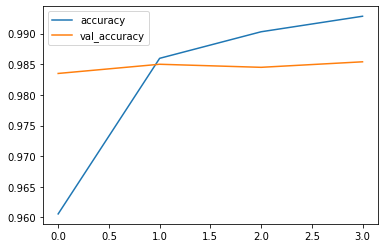

In [40]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

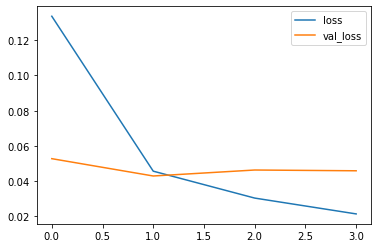

In [41]:
losses[['loss','val_loss']].plot()

In [42]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04590224474668503, 0.9854000210762024]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = model.predict_classes(x_test)

C:\Users\sony\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [47]:
predictions[0]

7

In [48]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
confusion_matrix(y_test,predictions)

array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    3, 1025,    0,    0,    0,    0,    3,    1,    0],
       [   1,    0,    7,  992,    0,    3,    0,    5,    1,    1],
       [   1,    0,    1,    0,  973,    0,    3,    0,    0,    4],
       [   2,    0,    1,    5,    0,  878,    3,    0,    1,    2],
       [   8,    3,    0,    0,    1,    2,  944,    0,    0,    0],
       [   1,    2,   10,    0,    0,    0,    0, 1010,    1,    4],
       [  10,    0,    6,    2,    3,    0,    1,    3,  944,    5],
       [   4,    3,    1,    0,   15,    4,    0,    6,    0,  976]],
      dtype=int64)

(0.0, 10.0)

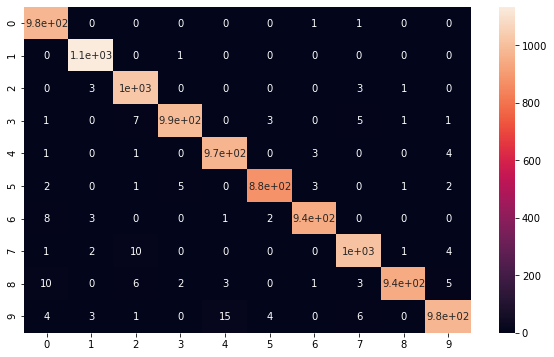

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.xlim(0,10)